# Importing Libraries

In [4]:
!pip install pandas numpy scikit-learn tensorflow plotly folium streamlit

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.9 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.9 kB 328.2 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.9 kB 419.2 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/110.9 kB 375.8 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 358.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   -------------------------------------- - 51.2/53.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 53.0/53.0 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import plotly.express as px
import folium
import streamlit as st
from streamlit.components.v1 import html
import warnings
warnings.filterwarnings('ignore')

# Dataset Loading

In [13]:
# Load the training dataset with full path
train_df = pd.read_csv(r'D:/Projects/Portfolio projects/Earthquakes Dataset/usgs_main.csv')

# Load the testing dataset with full path
test_df = pd.read_csv(r'D:/Projects/Portfolio projects/Earthquakes Dataset/usgs_current.csv')

In [19]:
# Display the first few rows of each dataset
train_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.0,0.004494,0.04,...,2022-03-04T21:29:36.906Z,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.0,0.016320,0.02,...,2022-03-04T21:29:02.128Z,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.0,0.159000,0.01,...,2022-03-04T21:26:56.893Z,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.0,0.020530,0.13,...,2022-03-04T21:24:10.449Z,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.52,...,2022-03-04T21:22:15.794Z,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


In [21]:
test_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-12T22:36:07.230Z,33.032667,-116.396500,9.190,0.93,ml,17.0,77.0,0.1104,0.26,...,2022-12-12T22:39:39.023Z,"20km ESE of Julian, CA",earthquake,0.44,1.830,0.148,10.0,automatic,ci,ci
1,2022-12-12T22:13:04.710Z,36.042500,-117.709333,1.240,1.46,ml,15.0,91.0,0.1279,0.19,...,2022-12-12T22:16:41.824Z,"21km ENE of Little Lake, CA",earthquake,0.38,0.640,0.196,17.0,automatic,ci,ci
2,2022-12-12T22:10:02.494Z,-3.311200,129.071500,61.922,5.30,mb,63.0,55.0,3.1970,0.55,...,2022-12-12T22:29:42.040Z,"17 km E of Amahai, Indonesia",earthquake,7.35,6.707,0.062,89.0,reviewed,us,us
3,2022-12-12T22:08:29.330Z,19.195300,-64.889300,36.000,3.78,md,14.0,300.0,0.8451,0.19,...,2022-12-12T22:36:48.143Z,"94 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,2.81,12.250,0.070,5.0,reviewed,pr,pr
4,2022-12-12T21:56:53.630Z,35.959667,-117.471667,2.690,1.17,ml,16.0,131.0,0.1082,0.13,...,2022-12-12T22:00:44.507Z,"22km NNW of Searles Valley, CA",earthquake,0.32,0.770,0.064,9.0,automatic,ci,ci


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75810 entries, 0 to 75809
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             75810 non-null  object 
 1   latitude         75810 non-null  float64
 2   longitude        75810 non-null  float64
 3   depth            75810 non-null  float64
 4   mag              75796 non-null  float64
 5   magType          75796 non-null  object 
 6   nst              59660 non-null  float64
 7   gap              62685 non-null  float64
 8   dmin             49640 non-null  float64
 9   rms              75792 non-null  float64
 10  net              75810 non-null  object 
 11  id               75810 non-null  object 
 12  updated          75810 non-null  object 
 13  place            75810 non-null  object 
 14  type             75810 non-null  object 
 15  horizontalError  56668 non-null  float64
 16  depthError       75742 non-null  float64
 17  magError    

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             183 non-null    object 
 1   latitude         183 non-null    float64
 2   longitude        183 non-null    float64
 3   depth            183 non-null    float64
 4   mag              183 non-null    float64
 5   magType          183 non-null    object 
 6   nst              154 non-null    float64
 7   gap              154 non-null    float64
 8   dmin             133 non-null    float64
 9   rms              183 non-null    float64
 10  net              183 non-null    object 
 11  id               183 non-null    object 
 12  updated          183 non-null    object 
 13  place            183 non-null    object 
 14  type             183 non-null    object 
 15  horizontalError  142 non-null    float64
 16  depthError       183 non-null    float64
 17  magError        

In [35]:
train_df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                   14
magType               14
nst                16150
gap                13125
dmin               26170
rms                   18
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    19142
depthError            68
magError           17061
magNst             13161
status                 0
locationSource         0
magSource              0
dtype: int64

In [29]:
test_df.isnull().sum()

time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                29
gap                29
dmin               50
rms                 0
net                 0
id                  0
updated             0
place               0
type                0
horizontalError    41
depthError          0
magError           29
magNst             29
status              0
locationSource      0
magSource           0
dtype: int64

# Data PreProcessing

In [39]:
# Convert 'time' and 'updated' to DateTime
train_df['time'] = pd.to_datetime(train_df['time'])
train_df['updated'] = pd.to_datetime(train_df['updated'])
test_df['time'] = pd.to_datetime(test_df['time'])
test_df['updated'] = pd.to_datetime(test_df['updated'])

In [41]:
# Handle missing values in numerical columns (fill with mean)
numeric_cols = ['mag', 'depth', 'latitude', 'longitude', 'nst', 'gap', 'dmin', 'rms', 
                'horizontalError', 'depthError', 'magError', 'magNst']
for col in numeric_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())

In [43]:
# Handle missing values in categorical columns (fill with mode or placeholder)
categorical_cols = ['magType', 'net', 'id', 'place', 'type', 'status', 'locationSource', 'magSource']
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  # Most frequent value
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [45]:
# Select relevant columns for modeling (focusing on core features)
columns_to_keep = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'nst', 'gap']
train_df = train_df[columns_to_keep]
test_df = test_df[columns_to_keep]

In [47]:
# Create time-series feature: lagged magnitude
train_df['mag_lag1'] = train_df['mag'].shift(1).fillna(train_df['mag'].mean())
test_df['mag_lag1'] = test_df['mag'].shift(1).fillna(test_df['mag'].mean())

In [ ]:
# Display the first few rows after preprocessing
train_df.head()

In [51]:
test_df.head()

,time,latitude,longitude,depth,mag,place,nst,gap,mag_lag1
0,2022-12-12 22:36:07.230000+00:00,33.032667,-116.396500,9.190,0.93,"20km ESE of Julian, CA",17.0,77.0,1.956885
1,2022-12-12 22:13:04.710000+00:00,36.042500,-117.709333,1.240,1.46,"21km ENE of Little Lake, CA",15.0,91.0,0.930000
2,2022-12-12 22:10:02.494000+00:00,-3.311200,129.071500,61.922,5.30,"17 km E of Amahai, Indonesia",63.0,55.0,1.460000
3,2022-12-12 22:08:29.330000+00:00,19.195300,-64.889300,36.000,3.78,"94 km N of Charlotte Amalie, U.S. Virgin Islands",14.0,300.0,5.300000
4,2022-12-12 21:56:53.630000+00:00,35.959667,-117.471667,2.690,1.17,"22km NNW of Searles Valley, CA",16.0,131.0,3.780000


# Disaster Impact Prediction (Time-Series)

## Explanation
### Scaling:
* Uses MinMaxScaler to scale mag values to a 0-1 range, which helps LSTM converge better.
* Fits the scaler on train_df and applies it to both train_df and test_df.
### Sequence Creation:
* create_sequences: Creates input-output pairs where each input is a sequence of 10 magnitudes, and the output is the next magnitude.
* seq_length = 10: Uses the past 10 quakes to predict the next one.
### Reshaping:
* LSTM expects data in the shape [samples, time steps, features]. We reshape X_train and X_test to [num_samples, 10, 1] (1 feature: mag).
### LSTM Model:
* 50 LSTM units with ReLU activation.
* A Dense layer outputs the predicted magnitude.
* Compiles with adam optimizer and mean squared error (mse) loss.
### Training:
* Trains for 20 epochs with a batch size of 32.
* Uses 20% of the training data for validation (validation_split=0.2).
### Prediction and Evaluation:
* Predicts on test_df.
* Inverse-transforms predictions and actual values back to the original scale.
* Calculates RMSE to measure prediction error.
* Shows a few predicted vs. actual magnitudes for comparison

In [54]:
# Prepare data for LSTM
# Scale the 'mag' column to a 0-1 range
scaler = MinMaxScaler()
train_mag_scaled = scaler.fit_transform(train_df[['mag']])
test_mag_scaled = scaler.transform(test_df[['mag']])

In [56]:
# Create sequences for LSTM (use past 10 quakes to predict the next)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_mag_scaled, seq_length)
X_test, y_test = create_sequences(test_mag_scaled, seq_length)

In [58]:
# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [60]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [62]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0214 - val_loss: 0.0169
Epoch 2/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 3/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0164 - val_loss: 0.0167
Epoch 4/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0171
Epoch 5/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0172
Epoch 6/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 7/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 8/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0164 - val_loss: 0.0170
Epoch 9/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0168
Epoch 10/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 11/20
1895/1895 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0163 - val_loss: 0.0170
Epoch 12/20
1895/1895 ━━━━━━━━

In [64]:
# Make predictions on the test set
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [66]:
# Inverse transform to get actual magnitude values
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

In [68]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_test_actual - y_pred_actual) ** 2))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 1.2426


In [70]:
# Display a few predictions vs actual values
print("\nSample Predictions vs Actual Values:")
for i in range(5):
    print(f"Predicted: {y_pred_actual[i][0]:.2f}, Actual: {y_test_actual[i][0]:.2f}")


Sample Predictions vs Actual Values:
Predicted: 1.79, Actual: 2.10
Predicted: 1.82, Actual: 1.67
Predicted: 1.81, Actual: 0.29
Predicted: 1.50, Actual: 2.00
Predicted: 1.66, Actual: 2.00


# Damage Assessment (Classification)

## Explanation
### Impact Categories:
* Uses pd.cut to bin mag into three categories:
* Low: < 4.0
* Moderate: 4.0 to <6.0
* Severe: ≥ 6.0
* These thresholds are standard for earthquake impact (minor shaking below 4, moderate damage 4–6, severe damage above 6).
### Features and Target:
* Features: mag, depth, latitude, longitude, nst, gap, mag_lag1.
* Target: impact (Low, Moderate, Severe).
### Random Forest Classifier:
* Trains a Random Forest with 100 trees (n_estimators=100) for robustness.
* random_state=42 ensures reproducibility.
### Evaluation:
* classification_report: Shows precision, recall, and F1-score for each class (Low, Moderate, Severe).
* Feature importance: Identifies which features (e.g., mag, depth) most influence the classification.

In [74]:
# Create impact categories based on magnitude
# Low: mag < 4.0, Moderate: 4.0 ≤ mag < 6.0, Severe: mag ≥ 6.0
train_df['impact'] = pd.cut(train_df['mag'], bins=[-float('inf'), 4.0, 6.0, float('inf')], 
                            labels=['Low', 'Moderate', 'Severe'])
test_df['impact'] = pd.cut(test_df['mag'], bins=[-float('inf'), 4.0, 6.0, float('inf')], 
                           labels=['Low', 'Moderate', 'Severe'])

In [76]:
# Prepare features and target
X_train = train_df[['mag', 'depth', 'latitude', 'longitude', 'nst', 'gap', 'mag_lag1']]
y_train = train_df['impact']
X_test = test_df[['mag', 'depth', 'latitude', 'longitude', 'nst', 'gap', 'mag_lag1']]
y_test = test_df['impact']

In [78]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [82]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       161
    Moderate       1.00      1.00      1.00        22

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



In [84]:
# Display feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:
     Feature  Importance
0        mag    0.583987
3  longitude    0.182299
2   latitude    0.157769
1      depth    0.045605
4        nst    0.023832
5        gap    0.005613
6   mag_lag1    0.000894


# Resource Allocation (Optimization)

## Explanation
### Resource Definition:
* total_resources = 100: Arbitrary units (e.g., 100 units of supplies like food, water, or rescue teams).
### Filter Priority Quakes:
* Selects quakes from test_df with impact as Moderate or Severe (we’re prioritizing these over Low-impact quakes).
* Keeps relevant columns: latitude, longitude, mag, place, impact.
### Resource Allocation:
* If there are priority quakes:
* Allocates resources proportionally to mag (higher magnitude = more resources).
* Formula: (mag / total_mag) * total_resources.
* If no priority quakes, prints a message and assigns 0 resources.
### Output:
* Shows each priority quake’s location, magnitude, impact, and allocated resources.
* Confirms the total resources allocated (should be 100 if there are priority quakes).

In [90]:
# Define total resources (arbitrary units, e.g., 100 units of supplies)
total_resources = 100

# Focus on Moderate and Severe quakes in the test set for resource allocation
priority_quakes = test_df[test_df['impact'].isin(['Moderate', 'Severe'])][['latitude', 'longitude', 'mag', 'place', 'impact']]

# If there are priority quakes, allocate resources proportionally to magnitude
if len(priority_quakes) > 0:
    # Calculate resource allocation based on magnitude (higher mag gets more resources)
    priority_quakes['resource_share'] = (priority_quakes['mag'] / priority_quakes['mag'].sum()) * total_resources
else:
    print("No Moderate or Severe quakes in the test set to allocate resources.")
    priority_quakes['resource_share'] = 0

# Display the quakes and their allocated resources
print("Resource Allocation for Moderate and Severe Quakes:")
print(priority_quakes[['place', 'mag', 'impact', 'resource_share']])

Resource Allocation for Moderate and Severe Quakes:
                                           place  mag    impact  \
2                   17 km E of Amahai, Indonesia  5.3  Moderate   
16        35 km NW of Kandrian, Papua New Guinea  4.6  Moderate   
20                     Izu Islands, Japan region  4.9  Moderate   
22                    83 km SE of Mazamari, Peru  4.6  Moderate   
24            178 km NNW of Maubara, Timor Leste  4.8  Moderate   
25                               south of Panama  5.5  Moderate   
45               80 km E of Gorontalo, Indonesia  4.5  Moderate   
50                     south of the Fiji Islands  4.8  Moderate   
56   Andreanof Islands, Aleutian Islands, Alaska  4.1  Moderate   
72           71 km NE of Kimbe, Papua New Guinea  4.6  Moderate   
86                 23 km E of Mugur-Aksy, Russia  4.7  Moderate   
107                    Izu Islands, Japan region  4.6  Moderate   
116             48 km SE of Halibut Cove, Alaska  4.5  Moderate   
123       

In [92]:
# Summary of total resources allocated
total_allocated = priority_quakes['resource_share'].sum()
print(f"\nTotal Resources Allocated: {total_allocated:.2f} out of {total_resources}")


Total Resources Allocated: 100.00 out of 100


# Visualizations

## Explanation
### Time-Series Plot:
* Uses Plotly to create a line chart of mag over time for the test set.
* Saves it as magnitude_plot.html using write_html().
### Folium Map:
* Creates a map centered on the average latitude and longitude of the test set.
* Adds markers for each earthquake (green for Low, orange for Moderate, red for Severe).
* Saves it as earthquake_map.html.
### Resource Allocation:
* Prints the priority_quakes table directly to the console, showing the resource allocation for Moderate and Severe quakes.
### Output:
* Provides instructions to open the HTML files in a browser to view the visualizations.
* Prints the resource allocation table.

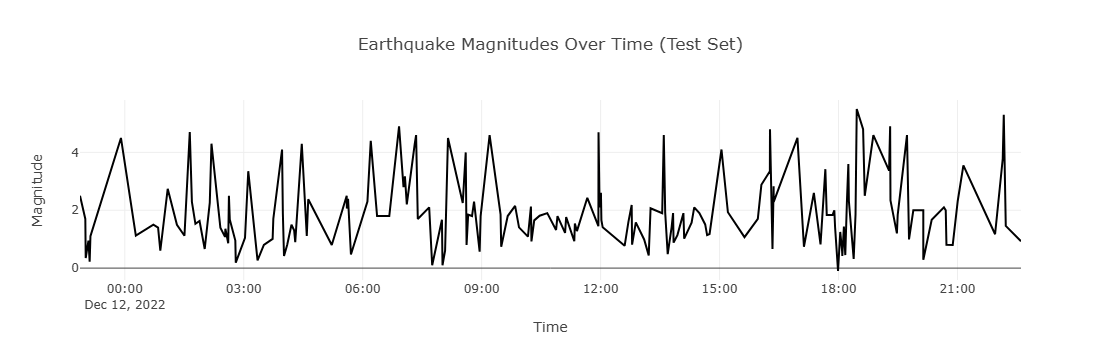

Could not save as PNG. Ensure kaleido is installed. Error: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido




Resource Allocation for Moderate and Severe Quakes:
                                           place  mag    impact  \
2                   17 km E of Amahai, Indonesia  5.3  Moderate   
16        35 km NW of Kandrian, Papua New Guinea  4.6  Moderate   
20                     Izu Islands, Japan region  4.9  Moderate   
22                    83 km SE of Mazamari, Peru  4.6  Moderate   
24            178 km NNW of Maubara, Timor Leste  4.8  Moderate   
25                               south of Panama  5.5  Moderate   
45               80 km E of Gorontalo, Indonesia  4.5  Moderate   
50                     south of the Fiji Islands  4.8  Moderate   
56   Andreanof Islands, Aleutian Islands, Alaska  4.1  Moderate   
72           71 km NE of Kimbe, Papua New Guinea  4.6  Moderate   
86                 23 km E of Mugur-Aksy, Russia  4.7  Moderate   
107                    Izu Islands, Japan region  4.6  Moderate   
116             48 km SE of Halibut Cove, Alaska  4.5  Moderate   
123      

In [107]:
# Time-series plot of magnitudes (test set)
fig = px.line(test_df, x='time', y='mag', title='Earthquake Magnitudes Over Time (Test Set)')
fig.update_layout(xaxis_title='Time', yaxis_title='Magnitude')

# Display the Plotly chart directly in Jupyter
fig.show()

# Optional: Save as PNG (only if kaleido is installed)
try:
    fig.write_image('magnitude_plot.png')
    print("Saved time-series plot as 'magnitude_plot.png'")
except ValueError as e:
    print("Could not save as PNG. Ensure kaleido is installed. Error:", e)

# Create a Folium map to visualize earthquake locations and impact
m = folium.Map(location=[test_df['latitude'].mean(), test_df['longitude'].mean()], zoom_start=2)

# Add markers for each earthquake
for i, row in test_df.iterrows():
    color = 'red' if row['impact'] == 'Severe' else 'orange' if row['impact'] == 'Moderate' else 'green'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 2,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Place: {row['place']}<br>Mag: {row['mag']}<br>Impact: {row['impact']}"
    ).add_to(m)

# Display the Folium map directly in Jupyter
from IPython.display import display
display(m)

# Display resource allocation (reusing priority_quakes from Step 5)
print("\nResource Allocation for Moderate and Severe Quakes:")
if len(priority_quakes) > 0:
    print(priority_quakes[['place', 'mag', 'impact', 'resource_share']])
else:
    print("No Moderate or Severe quakes to allocate resources.")